<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3<br>
<font color=696880 size=4>
    Ashkan Majidi - Shayan Salehi - Amirhossein Alamdar

____

# Personal Data

In [1]:
student_number = '400110154'
first_name = 'Sina'
last_name = 'Namazi'

# Introduction

In this assignment, you will implement SVM (Support Vector Machines) for classification.


# Data Prepfocessing

Import your needed libraries in following cell.

In [2]:
# TODO: Write your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import cvxopt
import seaborn as sns
from sklearn.svm import SVC

Load data from ```satimage``` dataset and split data to features and labels. The ```label``` column is our target variable. 

In [3]:
# TODO: Write your code here
data_path = './Data/satimage.csv'
data = pd.read_csv(data_path)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,label
0,7.5,6.272730,4.047619,3.975208,3.032258,4.545455,8.421050,1.8125,-2.2500,0.077672,...,-0.600000,-0.138462,-0.188119,-0.431579,-0.546875,-0.15625,-0.126214,-0.431579,-0.484375,6.0
1,7.5,4.090909,-0.714290,1.776858,2.903226,3.090909,5.052630,-1.7500,-2.2500,0.077672,...,-0.600000,-0.015385,-0.049505,-0.431579,-0.609375,-0.15625,-0.126214,-0.494737,-0.609375,6.0
2,12.0,9.909090,8.333330,5.479339,3.354839,7.272730,10.526316,2.7500,3.4375,6.368924,...,-0.233333,0.200000,0.207921,-0.010526,-0.312500,-0.15625,0.009709,-0.326316,-0.437500,6.0
3,7.5,4.818182,1.190480,2.702482,2.774194,2.363640,5.894740,-0.2500,-3.8750,-2.368924,...,-0.383333,-0.138462,-0.049505,-0.347368,-0.484375,0.09375,0.087379,-0.031579,-0.218750,6.0
4,7.5,4.818182,2.142860,2.702482,3.032258,3.090909,6.736840,-1.0000,-0.6250,-1.320388,...,-0.183333,0.230769,0.267327,-0.031579,-0.281250,-0.03125,-0.126214,-0.431579,-0.546875,6.0


Now split data to train, validation and test parts. 60% of data should be used for train, 15% for validation and 25% for test. After that scale the data to Standard Normal Distribution using ```StandardScaler``` class from ```scikit-learn``` library.

In [4]:
# TODO: Write your code here

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("All Samples: ", X.shape[0])
print(f"Training Samples: {X_train.shape[0]}\nValidation Samples: {X_val.shape[0]}\nTesting Samples: {X_test.shape[0]}")

All Samples:  6435
Training Samples: 3860
Validation Samples: 966
Testing Samples: 1609


We want to train Binary SVM model for classification between labels 4 and 6. Choose corresponding datas and convert their lables to 1 and -1 respectively for 4 and 6.

In [5]:
# TODO: Write your code here

X_4_6 = X[(Y == 4) | (Y == 6)]
Y_4_6 = Y[(Y == 4) | (Y == 6)]

Y_4_6 = Y_4_6.apply(lambda x: 1 if x == 6 else -1).values

X_train_4_6, X_test_4_6, Y_train_4_6, Y_test_4_6 = train_test_split(X_4_6, Y_4_6, test_size=0.25, random_state=42)
X_train_4_6, X_val_4_6, Y_train_4_6, Y_val_4_6 = train_test_split(X_train_4_6, Y_train_4_6, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_4_6 = scaler.fit_transform(X_train_4_6)
X_val_4_6 = scaler.transform(X_val_4_6)
X_test_4_6 = scaler.transform(X_test_4_6)

print("All 4 and 6 Samples: ", X_4_6.shape[0])
print(f"Training Samples: {X_train_4_6.shape[0]}\nValidation Samples: {X_val_4_6.shape[0]}\nTesting Samples: {X_test_4_6.shape[0]}")

All 4 and 6 Samples:  2134
Training Samples: 1280
Validation Samples: 320
Testing Samples: 534


# Model (50 points)

Here is soft margin svm convex optimization formulation. 
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^N \xi_i \\
\text { Subject to } & y_i\left(\mathbf{w}^T \mathbf{x}_i+b\right) \geq 1-\xi_i, \quad i=1,2, \ldots, N \\
& \xi_i \geq 0, \quad i=1,2, \ldots, N
\end{aligned}
$$
write dual of the soft margin svm optimization problem below:

`TODO: Write Here`


-------------------

### Dual Problem Formulation

The Lagrangian for the primal soft margin SVM problem is given by:

$$
L(\mathbf{w}, b, \xi, \alpha, r) = \frac{1}{2}\|\mathbf{w}\|^2 + C \sum_{i=1}^N \xi_i - \sum_{i=1}^N \alpha_i \left( y_i(\mathbf{w}^T \mathbf{x}_i + b) - 1 + \xi_i \right) - \sum_{i=1}^N r_i \xi_i
$$

Here, $\alpha_i$ and $r_i$ are the Lagrange multipliers, with $\alpha_i \geq 0$ and $r_i \geq 0$ for all $i$. To find the dual problem, we need to minimize $L$ with respect to $\mathbf{w}$, $b$, and $\xi_i$, and then maximize with respect to the Lagrange multipliers under the constraints $\alpha_i \geq 0$ and $r_i \geq 0$.

#### Minimizing the Lagrangian
1. **With respect to $\mathbf{w}$:**
   $$
   \nabla_{\mathbf{w}} L = \mathbf{w} - \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i = 0 \implies \mathbf{w} = \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i
   $$

2. **With respect to $b$:**
   $$
   \frac{\partial L}{\partial b} = -\sum_{i=1}^N \alpha_i y_i = 0 \implies \sum_{i=1}^N \alpha_i y_i = 0
   $$

3. **With respect to $\xi_i$:**
   $$
   \frac{\partial L}{\partial \xi_i} = C - \alpha_i - r_i = 0 \implies \alpha_i + r_i = C
   $$

#### Substituting and Simplifying
After substituting back these conditions into the Lagrangian, the terms involving $\mathbf{w}$ and $\xi_i$ vanish, and we are left with the dual formulation, which is a maximization problem:

$$
\begin{aligned}
\text{Maximize} & \quad -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (\mathbf{x}_i^T \mathbf{x}_j) + \sum_{i=1}^N \alpha_i \\
\text{Subject to} & \quad \sum_{i=1}^N \alpha_i y_i = 0 \\
& \quad 0 \leq \alpha_i \leq C, \quad i=1,2, \ldots, N
\end{aligned}
$$

-------------------


Now you should write this optimization problem in standard Quadratic Program (QP) form and use a QP solver to find optimal answer. Here is General form of a QP:
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2} x^TPx + q^Tx + r \\
\text { Subject to } & Gx \leq h \\
& Ax = b
\end{aligned}
$$

Complete functions below and use ```cvxopt``` library which is a common library for solving QPs. Note that you can't use ```scikit-learn``` library.


In [6]:
def soft_margin_svm(X, y, C):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """
    # TODO: Write your code here

    n_samples, n_features = X.shape
    y = y.astype(np.double)

    K = X @ X.T
    P = cvxopt.matrix(K * np.outer(y, y))
    q = cvxopt.matrix(-np.ones((n_samples, 1)))
    G = cvxopt.matrix(np.vstack((np.eye(n_samples) * -1, np.eye(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = cvxopt.matrix(y.reshape(1, -1))
    b = cvxopt.matrix(np.zeros(1))

    solution = cvxopt.solvers.qp(P, q, G, h, A, b)

    alphas = np.ravel(solution['x'])

    sv = alphas > 10e-6
    support_vectors = X[sv]
    support_vector_labels = y[sv]
    support_vector_alphas = alphas[sv]

    biases = []
    filtered_indices = np.where(alphas > 10e-6)[0]
    sorted_indices = filtered_indices[np.argsort(alphas[filtered_indices])]
    min_ten_indices = sorted_indices[:10]
    for i in min_ten_indices:
        b = 0
        if alphas[i] < C - 10e-6:
            b += y[i]
            for j in range(len(X)):
                if sv[j]:
                    b -= alphas[j] * y[j] * K[i, j]
            biases.append(b)
    bias = np.mean(biases)

    return support_vectors, support_vector_labels, support_vector_alphas, bias

In [7]:
C = 1.0
support_vectors, support_vector_labels, support_vector_alphas, bias = soft_margin_svm(X_train_4_6, Y_train_4_6, C)

     pcost       dcost       gap    pres   dres
 0: -6.0194e+02 -3.3167e+03  2e+04  3e+00  6e-13
 1: -4.1438e+02 -2.2170e+03  3e+03  4e-01  3e-13
 2: -3.8141e+02 -7.8919e+02  5e+02  4e-02  2e-13
 3: -4.1861e+02 -5.5081e+02  1e+02  1e-02  2e-13
 4: -4.3275e+02 -5.1951e+02  1e+02  6e-03  2e-13
 5: -4.4163e+02 -4.9884e+02  6e+01  3e-03  2e-13
 6: -4.5108e+02 -4.7851e+02  3e+01  1e-03  2e-13
 7: -4.5388e+02 -4.7256e+02  2e+01  6e-04  2e-13
 8: -4.5735e+02 -4.6582e+02  9e+00  8e-05  2e-13
 9: -4.5958e+02 -4.6286e+02  3e+00  2e-05  2e-13
10: -4.6052e+02 -4.6161e+02  1e+00  3e-14  2e-13
11: -4.6093e+02 -4.6116e+02  2e-01  7e-15  2e-13
12: -4.6102e+02 -4.6105e+02  3e-02  3e-15  2e-13
13: -4.6104e+02 -4.6104e+02  1e-03  1e-14  2e-13
14: -4.6104e+02 -4.6104e+02  2e-05  2e-15  2e-13
Optimal solution found.


In [8]:
def predict_labels(x_test, support_vectors, support_vector_labels, support_vector_alphas, bias, kernel_type='linear', gamma=1):
    """
    input:
        x_test: test data
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    output:
        y_pred: predictoin labels
    """
    
    # # TODO: Write your code here
        
    y_pred = []
    for x in x_test:
        prediction = bias
        for i in range(len(support_vectors)):
            if kernel_type=='linear':
                prediction += support_vector_alphas[i] * support_vector_labels[i] * np.dot(support_vectors[i], x)
            elif kernel_type=='rbf':
                prediction += support_vector_alphas[i] * support_vector_labels[i] * np.exp(-gamma * (np.linalg.norm(support_vectors[i]-x)**2))
        y_pred.append(np.sign(prediction))
    return y_pred

In [9]:
y_pred = predict_labels(np.array(X_test_4_6), support_vectors, support_vector_labels, support_vector_alphas, bias)

# Evaluation (20 points)

Compute accuracy, balanced accuracy and plot confusion matrix of your trained model using ```Seaborn.heatmap()``` function. Use case of balanced accuracy is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the other and it is defined by average of recall of classes. Confusion matrix is a $k\times k$ (k is number of classes) matrix which cell ij is showing that number of data points labeld i which predicted j. For more detail of evaluation metrics you can see [here](https://neptune.ai/blog/balanced-accuracy).

You may use ```scikit-learn``` library to compute these metrics.

In [10]:
def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """
    # TODO: Write your code here

    accuracy = None
    balanced_accuracy = None
    confusion_mat = None

    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    return accuracy, balanced_accuracy, confusion_mat

_, _, confusion_mat = evaluate(Y_test_4_6, y_pred)

Accuracy:  0.8258426966292135
Balanced Accuracy:  0.7855936069202047
Confusion Matrix:
 [[108  49]
 [ 44 333]]


<Axes: >

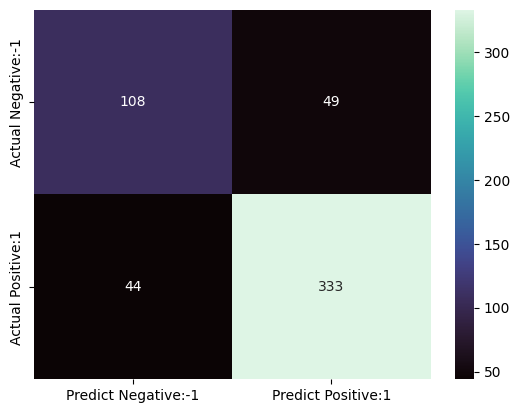

In [11]:
cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Fine-tunning (40 points)

like what you did before, implement Soft Margin SVM but now use rbf kernel. To determine rbf $\gamma$ parameter use validation datas and find best(best by balanced accuracy) $\gamma$ between 0.001 , 0.01, 1, 10, 100. Not that you can't use ```scikit-learn``` library here.

In [12]:
def rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    # TODO: Write your code here
    x1 = np.asarray(x1)
    x2 = np.asarray(x2)
    output = np.exp(-gamma * (np.linalg.norm(x1 - x2) ** 2))
    return output

def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """

    # TODO: Write your code here
    n_samples, n_features = X.shape
    y = y.astype(np.double)

    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf(X[i], X[j], gamma)
    P = cvxopt.matrix(K * np.outer(y, y))
    q = cvxopt.matrix(-np.ones((n_samples, 1)))
    G = cvxopt.matrix(np.vstack((np.eye(n_samples) * -1, np.eye(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = cvxopt.matrix(y, (1, n_samples), 'd')
    b = cvxopt.matrix(0.0)

    solution = cvxopt.solvers.qp(P, q, G, h, A, b, options={'show_progress': False})

    alphas = np.ravel(solution['x'])

    sv = alphas > 10e-6
    support_vectors = X[sv]
    support_vector_labels = y[sv]
    support_vector_alphas = alphas[sv]

    biases = []
    filtered_indices = np.where(alphas > 10e-6)[0]
    sorted_indices = filtered_indices[np.argsort(alphas[filtered_indices])]
    min_ten_indices = sorted_indices[:10]
    for i in min_ten_indices:
        b = 0
        if alphas[i] < C - 10e-6:
            b += y[i]
            for j in range(len(X)):
                if sv[j]:
                    b -= alphas[j] * y[j] * K[i, j]
            biases.append(b)
    bias = np.mean(biases)
    
    return support_vectors, support_vector_labels, support_vector_alphas, bias

In [13]:
gammas = [0.01, 0.1, 1, 10, 100]
best_gamma = None
best_support_vectors = None
best_support_vector_labels = None
best_support_vector_alphas = None

# TODO: Write your code here

best_balanced_acc = 0
for gamma in gammas:
    support_vectors, support_vector_labels, support_vector_alphas, bias = soft_margin_svm(X_train_4_6, Y_train_4_6, C, gamma)
    y_pred = predict_labels(np.array(X_val_4_6), support_vectors, support_vector_labels, 
                            support_vector_alphas, bias, kernel_type='rbf', gamma=gamma)
    print("Gamma: ", gamma)
    _, balanced_acc, _ = evaluate(Y_val_4_6, y_pred)
    print("--------------------------")
    if balanced_acc > best_balanced_acc:
        best_balanced_acc = balanced_acc
        best_gamma = gamma
        best_support_vectors = support_vectors
        best_support_vector_labels = support_vector_labels
        best_support_vector_alphas = support_vector_alphas

        best_bias = bias

print("Best Gamma: ", best_gamma)
print("Best Balanced Accuracy: ", best_balanced_acc)

Gamma:  0.01
Accuracy:  0.85
Balanced Accuracy:  0.8234172387490466
Confusion Matrix:
 [[ 70  22]
 [ 26 202]]
--------------------------
Gamma:  0.1
Accuracy:  0.921875
Balanced Accuracy:  0.8868230358504958
Confusion Matrix:
 [[ 74  18]
 [  7 221]]
--------------------------
Gamma:  1
Accuracy:  0.725
Balanced Accuracy:  0.5217391304347826
Confusion Matrix:
 [[  4  88]
 [  0 228]]
--------------------------
Gamma:  10
Accuracy:  0.7125
Balanced Accuracy:  0.5
Confusion Matrix:
 [[  0  92]
 [  0 228]]
--------------------------
Gamma:  100
Accuracy:  0.7125
Balanced Accuracy:  0.5
Confusion Matrix:
 [[  0  92]
 [  0 228]]
--------------------------
Best Gamma:  0.1
Best Balanced Accuracy:  0.8868230358504958


Accuracy:  0.9044943820224719
Balanced Accuracy:  0.8580226055517073
Confusion Matrix:
 [[117  40]
 [ 11 366]]


<Axes: >

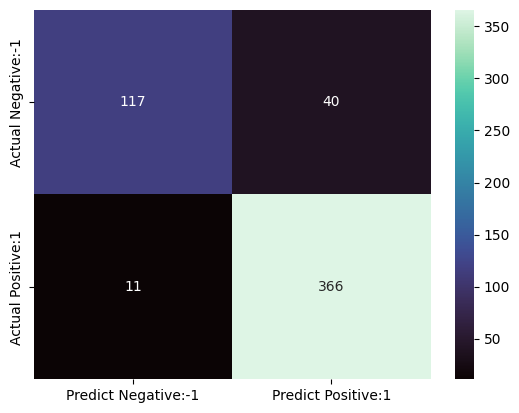

In [14]:
y_pred = predict_labels(np.array(X_test_4_6), best_support_vectors, best_support_vector_labels, 
                        best_support_vector_alphas, best_bias, kernel_type='rbf', gamma=best_gamma)
_, _, confusion_mat = evaluate(Y_test_4_6, y_pred)

cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Multiclass SVM (30 points + 50 points optional)

Now we want implement Multiclass SVM. Use ```SVC``` function with rbf kernel from ```scikit-learn``` package on all train datas (all six classes) and choose best hyperparameters for $C$ and $\gamma$ between 0.01, 0.1, 1, 10, 100. After that evaluate it with your function.

Note that in this example we had enough data to split them in train and validation but in case that we don't have enough data, ```scikit-learn``` has a built-in fast library named ```GridSearchCV()``` which can help us in hyperparameter tunning with cross validation.

In [15]:
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]
# TODO: Write your code here

best_C = None
best_gamma = None
best_accuracy = 0
for C in Cs:
    for gamma in gammas:
        clf = SVC(C=C, kernel='rbf', gamma=gamma)
        clf.fit(X_train, Y_train)
        y_pred = clf.predict(X_val)
        balanced_acc = balanced_accuracy_score(Y_val, y_pred)
        print(f'C: {C}\nGamma: {gamma}\nBalanced Accuracy: {balanced_acc}')
        print("---------------------------")
        if balanced_acc > best_accuracy:
            best_accuracy = balanced_acc
            best_C = C
            best_gamma = gamma

print("Best C: ", best_C)
print("Best Gamma: ", best_gamma)
print("Best Balanced Accuracy: ", best_accuracy)

C: 0.01
Gamma: 0.01
Balanced Accuracy: 0.6250444850055475
---------------------------
C: 0.01
Gamma: 0.1
Balanced Accuracy: 0.6495040765276258
---------------------------
C: 0.01
Gamma: 1
Balanced Accuracy: 0.16666666666666666
---------------------------
C: 0.01
Gamma: 10
Balanced Accuracy: 0.16666666666666666
---------------------------
C: 0.01
Gamma: 100
Balanced Accuracy: 0.16666666666666666
---------------------------
C: 0.1
Gamma: 0.01
Balanced Accuracy: 0.7910077076516163
---------------------------
C: 0.1
Gamma: 0.1
Balanced Accuracy: 0.8530608158643149
---------------------------
C: 0.1
Gamma: 1
Balanced Accuracy: 0.390491683703893
---------------------------
C: 0.1
Gamma: 10
Balanced Accuracy: 0.16666666666666666
---------------------------
C: 0.1
Gamma: 100
Balanced Accuracy: 0.16666666666666666
---------------------------
C: 1
Gamma: 0.01
Balanced Accuracy: 0.8573127946834475
---------------------------
C: 1
Gamma: 0.1
Balanced Accuracy: 0.8884855520934036
------------------

Implement Multiclass SVM from scratch without using ready functions (optional).

In [16]:
# TODO: Write your code here

class Multiclass_SVM:
    def __init__(self, kernel_type, C=10, gamma=0.1, degree=3, coef0=1):
        self.kernel_type = kernel_type
        self.models = {}
        self.class2index = {}
        self.classes = []
        self.n_classes = 0
        self.C = C
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0

    def fit(self, X, Y):
        self.classes = np.unique(Y)
        self.classes = np.sort(self.classes)
        self.class2index = {cls: i for i, cls in enumerate(self.classes)}
        self.n_classes = len(self.classes)
        for i in range(self.n_classes):
            y = np.where(Y == self.classes[i], 1, -1).astype(np.double)
            n_samples, n_features = X.shape

            K = self._compute_kernel(X)
            P = cvxopt.matrix(K * np.outer(y, y))
            q = cvxopt.matrix(-np.ones((n_samples, 1)))
            G = cvxopt.matrix(np.vstack((np.eye(n_samples) * -1, np.eye(n_samples))))
            h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C)))
            A = cvxopt.matrix(y, (1, n_samples), 'd')
            b = cvxopt.matrix(0.0)

            solution = cvxopt.solvers.qp(P, q, G, h, A, b, options={'show_progress': False})
            alphas = np.ravel(solution['x'])

            sv = alphas > 10e-6
            support_vectors = X[sv]
            support_vector_labels = y[sv]
            support_vector_alphas = alphas[sv]

            biases = []
            filtered_indices = np.where(alphas > 10e-6)[0]
            sorted_indices = filtered_indices[np.argsort(alphas[filtered_indices])]
            min_ten_indices = sorted_indices[:10]
            for k in min_ten_indices:
                b = 0
                if alphas[k] < self.C - 10e-6:
                    b += y[k]
                    for j in range(len(X)):
                        if sv[j]:
                            b -= alphas[j] * y[j] * K[k, j]
                    biases.append(b)
            bias = np.mean(biases)

            self.models[i] = {
                'support_vectors': support_vectors,
                'support_vector_labels': support_vector_labels,
                'support_vector_alphas': support_vector_alphas,
                'bias': bias
            }

    def _compute_kernel(self, X):
        if self.kernel_type == 'linear':
            return X@X.T
        elif self.kernel_type == 'rbf':
            K = np.zeros((X.shape[0], X.shape[0]))
            for i in range(X.shape[0]):
                for j in range(X.shape[0]):
                    K[i, j] = np.exp(-self.gamma * (np.linalg.norm(X[i] - X[j])**2))
            return K
        elif self.kernel_type == 'poly':
            K = np.zeros((X.shape[0], X.shape[0]))
            for i in range(X.shape[0]):
                for j in range(X.shape[0]):
                    K[i, j] = (1 + np.dot(X[i], X[j]))**self.degree
            return K
        elif self.kernel_type == 'sigmoid':
            K = np.zeros((X.shape[0], X.shape[0]))
            for i in range(X.shape[0]):
                for j in range(X.shape[0]):
                    K[i, j] = np.tanh(self.gamma * np.dot(X[i], X[j]) + self.coef0)
            return K
        else:
            raise ValueError(f"Unsupported kernel type: {self.kernel_type}")

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self._predict_one(x))
        return np.array(predictions)

    def _predict_one(self, x):
        predictions = np.zeros(self.n_classes)
        for i in range(self.n_classes):
            model = self.models[i]
            support_vectors = model['support_vectors']
            support_vector_labels = model['support_vector_labels']
            support_vector_alphas = model['support_vector_alphas']
            prediction = model['bias']
            for alpha, label, sv in zip(support_vector_alphas, support_vector_labels, support_vectors):
                if self.kernel_type == 'linear':
                    prediction += alpha * label * np.dot(sv, x)
                elif self.kernel_type == 'rbf':
                    prediction += alpha * label * np.exp(-self.gamma * np.linalg.norm(sv - x)**2)
                elif self.kernel_type == 'poly':
                    prediction += alpha * label * (1 + np.dot(sv, x))**self.degree
                elif self.kernel_type == 'sigmoid':
                    prediction += alpha * label * np.tanh(self.gamma * np.dot(sv, x) + self.coef0)
            predictions[i] = prediction
        return self.classes[np.argmax(predictions)]

    def evaluate(self, X, Y):
        Y = np.array(Y)
        y_pred = self.predict(X)
        y_pred = np.array(y_pred)
        accuracy = accuracy_score(Y, y_pred)
        balanced_accuracy = balanced_accuracy_score(Y, y_pred)
        confusion_mat = confusion_matrix(Y, y_pred)
        return accuracy, balanced_accuracy, confusion_mat

### Testing the Model I Implemented:

Kernel: linear
Accuracy: 0.8241143567433188
Balanced Accuracy: 0.7472857535128151


<Axes: >

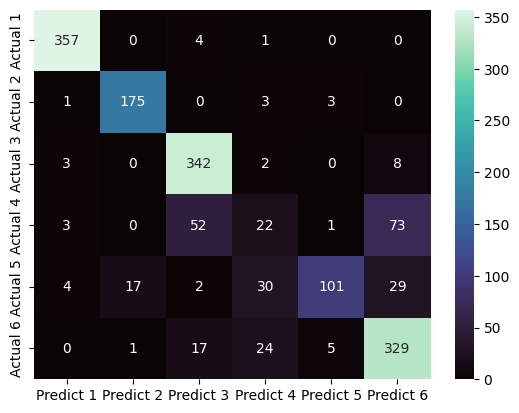

In [17]:
kernel_type = 'linear'
model = Multiclass_SVM(kernel_type)
model.fit(X_train, Y_train)
acc, balanced_acc, cm = model.evaluate(X_test, Y_test)
print(f'Kernel: {kernel_type}\nAccuracy: {acc}\nBalanced Accuracy: {balanced_acc}')

cols = [f'Predict {int(i)}' for i in model.classes]
index = [f'Actual {int(i)}' for i in model.classes]
cm_matrix = pd.DataFrame(data=cm, columns=cols, index=index)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

Kernel: rbf
Accuracy: 0.90863890615289
Balanced Accuracy: 0.8852328080647904


<Axes: >

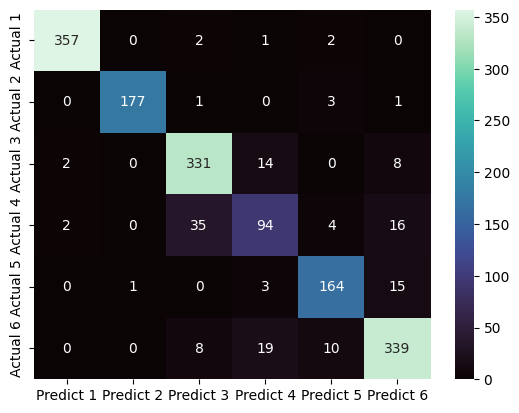

In [18]:
kernel_type = 'rbf'
model = Multiclass_SVM(kernel_type, C=10, gamma=0.1)
model.fit(X_train, Y_train)
acc, balanced_acc, cm = model.evaluate(X_test, Y_test)
print(f'Kernel: {kernel_type}\nAccuracy: {acc}\nBalanced Accuracy: {balanced_acc}')

cols = [f'Predict {int(i)}' for i in model.classes]
index = [f'Actual {int(i)}' for i in model.classes]
cm_matrix = pd.DataFrame(data=cm, columns=cols, index=index)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

Kernel: poly
Accuracy: 0.6749533871970168
Balanced Accuracy: 0.6085875166809038


<Axes: >

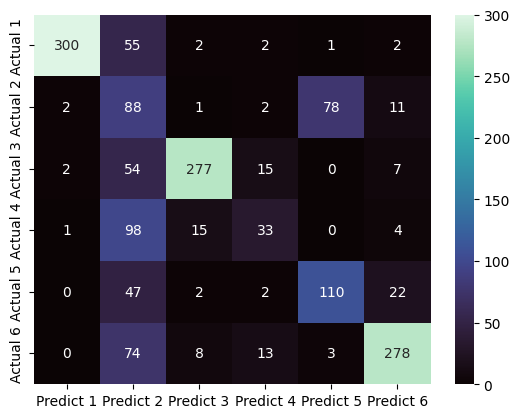

In [19]:
kernel_type = 'poly'
model = Multiclass_SVM(kernel_type, degree=3, C=20)
model.fit(X_train, Y_train)
acc, balanced_acc, cm = model.evaluate(X_test, Y_test)
print(f'Kernel: {kernel_type}\nAccuracy: {acc}\nBalanced Accuracy: {balanced_acc}')

cols = [f'Predict {int(i)}' for i in model.classes]
index = [f'Actual {int(i)}' for i in model.classes]
cm_matrix = pd.DataFrame(data=cm, columns=cols, index=index)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

Kernel: sigmoid
Accuracy: 0.7588564325668117
Balanced Accuracy: 0.6408612350984374


<Axes: >

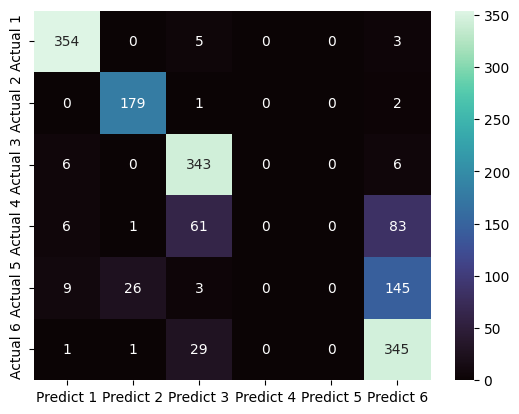

In [20]:
kernel_type = 'sigmoid'
model = Multiclass_SVM(kernel_type, gamma=0.001, C=1)
model.fit(X_train, Y_train)
acc, balanced_acc, cm = model.evaluate(X_test, Y_test)
print(f'Kernel: {kernel_type}\nAccuracy: {acc}\nBalanced Accuracy: {balanced_acc}')

cols = [f'Predict {int(i)}' for i in model.classes]
index = [f'Actual {int(i)}' for i in model.classes]
cm_matrix = pd.DataFrame(data=cm, columns=cols, index=index)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Different SVM Kernels (40 points)

A kernel in SVM is like a tool that helps solve tricky problems. It lets us work in a space with many dimensions, making complex calculations easier. With kernels, we can deal with lots of dimensions, even an endless amount. Kernels are crucial for sorting data into groups and help spot patterns in the data we're looking at. They're especially good at tackling twisty problems with a straightforward approach.

Sometimes, finding a straight line or flat surface to divide data isn't possible, especially as we explore more dimensions. That's where different types of SVM kernels come in handy. They transform twisty, complicated data into a simpler form that's easier to separate. In this explanation, we talk about 4 popular types of these kernels. Also in following cells you can use any package.

<img src="./kernel.jpg" alt="Types of Kernel Functions"  align=center class="saturate">

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

Kernel: linear
Accuracy: 0.8241143567433188
Balanced Accuracy: 0.7472857535128151


<Axes: >

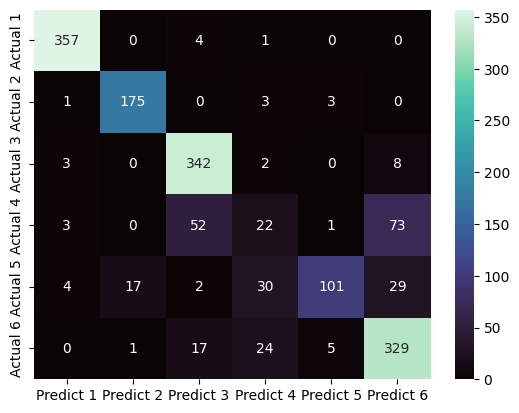

In [25]:
# TODO: Write your code here
kernel_type = 'linear'
model = Multiclass_SVM(kernel_type)
model.fit(X_train, Y_train)
acc, balanced_acc, cm = model.evaluate(X_test, Y_test)
print(f'Kernel: {kernel_type}\nAccuracy: {acc}\nBalanced Accuracy: {balanced_acc}')

cols = [f'Predict {int(i)}' for i in model.classes]
index = [f'Actual {int(i)}' for i in model.classes]
cm_matrix = pd.DataFrame(data=cm, columns=cols, index=index)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part. 

Accuracy:  0.906152889993785
Balanced Accuracy:  0.8839131603055369
Confusion Matrix:
 [[358   0   3   0   1   0]
 [  0 176   1   0   4   1]
 [  2   0 330  14   1   8]
 [  1   0  37  94   2  17]
 [  0   1   1   0 166  15]
 [  0   0   8  22  12 334]]


<Axes: >

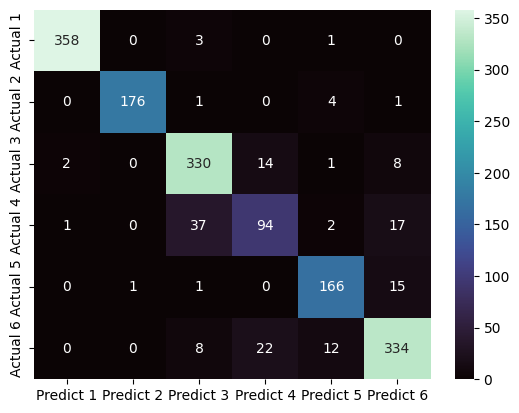

In [26]:
# TODO: Write your code here
kernel_type = 'rbf'
clf = SVC(C=10, kernel=kernel_type, gamma=0.1)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
accuracy, balanced_accuracy, cm = evaluate(Y_test, y_pred)

cols = [f'Predict {int(i)}' for i in clf.classes_]
index = [f'Actual {int(i)}' for i in clf.classes_]
cm_matrix = pd.DataFrame(data=cm, columns=cols, index=index)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

Accuracy:  0.8899937849596022
Balanced Accuracy:  0.8614519750306912
Confusion Matrix:
 [[360   0   1   0   1   0]
 [  1 173   1   1   5   1]
 [  5   0 335   8   0   7]
 [  7   0  42  85   4  13]
 [  5   1   0   3 158  16]
 [  0   1   8  30  16 321]]


<Axes: >

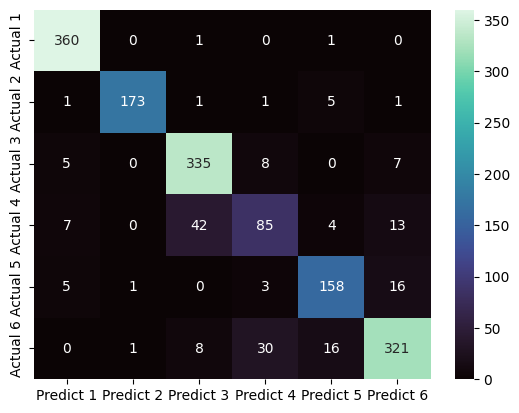

In [27]:
# TODO: Write your code here
kernel_type = 'poly'
clf = SVC(C=25, kernel=kernel_type, degree=3)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
accuracy, balanced_accuracy, cm = evaluate(Y_test, y_pred)

cols = [f'Predict {int(i)}' for i in clf.classes_]
index = [f'Actual {int(i)}' for i in clf.classes_]
cm_matrix = pd.DataFrame(data=cm, columns=cols, index=index)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts. 

Accuracy:  0.7445618396519578
Balanced Accuracy:  0.7077883231271985
Confusion Matrix:
 [[307   6   6   1  42   0]
 [ 20 156   0   1   5   0]
 [  4   0 322  20   1   8]
 [  2   0  33  56  10  50]
 [ 15  26   0  23 112   7]
 [  0   0   6  66  59 245]]


<Axes: >

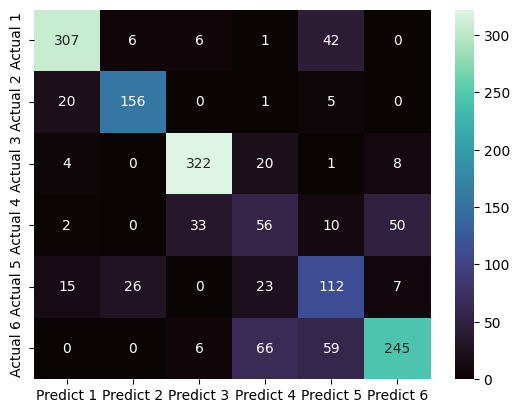

In [28]:
# TODO: Write your code here
kernel_type = 'sigmoid'
clf = SVC(C=10, kernel=kernel_type, gamma=0.02)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
accuracy, balanced_accuracy, cm = evaluate(Y_test, y_pred)

cols = [f'Predict {int(i)}' for i in clf.classes_]
index = [f'Actual {int(i)}' for i in clf.classes_]
cm_matrix = pd.DataFrame(data=cm, columns=cols, index=index)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one? 

`TODO: Write Here`

----------------------------

## Kernel Functions Comparison

### 1. Linear Kernel
- **Advantages**:
  - Simple and fast, effective for linearly separable data.
- **Disadvantages**:
  - Limited to linear relationships; struggles with complex datasets.

### 2. RBF Kernel
- **Advantages**:
  - Excellent for non-linear data, handles high-dimensional spaces well.
- **Disadvantages**:
  - Computationally intensive, can overfit if not tuned properly.

### 3. Polynomial Kernel
- **Advantages**:
  - Can model complex and non-linear interactions between features.
- **Disadvantages**:
  - Requires careful tuning of parameters, risk of overfitting with high degrees.

### 4. Sigmoid Kernel
- **Advantages**:
  - Mimics neural network behavior, useful for certain types of non-linear problems.
- **Disadvantages**:
  - Often less effective and harder to tune than other kernels.

## Performance Based on Our Data
- **RBF** kernel shows the highest accuracy and balanced accuracy, suggesting it's the best performer for handling complex patterns in the data.
- **Linear** and **Polynomial** kernels also show good performance but are less effective than RBF.
- **Sigmoid** kernel has the lowest performance, indicating it might not be suitable for our specific dataset or needs careful parameter tuning.

----------------------------

